In [1]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

Cloning into 'EVA-6'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 57 (delta 20), reused 48 (delta 17), pack-reused 0
Unpacking objects: 100% (57/57), 832.30 KiB | 723.00 KiB/s, done.


In [ ]:
!pip install -U albumentations
!pip install -U torchsummary
!pip install -U grad-cam
!pip install -U ttach

In [2]:
import sys
sys.path.append("./EVA-6/") 

In [3]:
from utils.DataLoader import Loader,mean_std,DeNorm
from src.models import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt
from utils.helper import get_mean_std


from pytorch_grad_cam import GradCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


# import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Data Loading & Transformation

In [4]:
loader = Loader(batch_size=256)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)

======> Computing mean and std of dataset


Extracting ./data/cifar-10-python.tar.gz to ./data


100%|██████████| 390/390 [00:08<00:00, 47.96it/s] 


Files already downloaded and verified
Files already downloaded and verified


## Model Creation & Training

In [5]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [6]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [9]:
(train_acc, train_losses, test_acc, test_losses), modelfinal = learner(model,train_data,test_data,
                                                                       epochs=40,optimiser= 'Adam',
                                                                       scheduler=False,device = device)

  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=4.8126325607299805 Batch_id=3 Accuracy=8.98:   2%|▏         | 4/196 [00:01<00:54,  3.50it/s]

Loss=1.7805640697479248 Batch_id=195 Accuracy=21.71: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.7834, Accuracy: 16976/50000 (33.95%)

Epoch 2:


Loss=1.4639172554016113 Batch_id=195 Accuracy=37.53: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.4438, Accuracy: 23653/50000 (47.31%)

Epoch 3:


Loss=1.3993583917617798 Batch_id=195 Accuracy=46.23: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3542, Accuracy: 25406/50000 (50.81%)

Epoch 4:


Loss=1.2189584970474243 Batch_id=195 Accuracy=52.43: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2006, Accuracy: 28502/50000 (57.00%)

Epoch 5:


Loss=1.2663381099700928 Batch_id=195 Accuracy=58.03: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9797, Accuracy: 32796/50000 (65.59%)

Epoch 6:


Loss=1.1947579383850098 Batch_id=195 Accuracy=61.83: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8735, Accuracy: 34615/50000 (69.23%)

Epoch 7:


Loss=0.8666180372238159 Batch_id=195 Accuracy=65.73: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8589, Accuracy: 34727/50000 (69.45%)

Epoch 8:


Loss=0.9169669151306152 Batch_id=195 Accuracy=68.57: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6647, Accuracy: 38384/50000 (76.77%)

Epoch 9:


Loss=0.9164234399795532 Batch_id=195 Accuracy=71.39: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6169, Accuracy: 39172/50000 (78.34%)

Epoch 10:


Loss=0.8422104120254517 Batch_id=195 Accuracy=73.96: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5144, Accuracy: 41070/50000 (82.14%)

Epoch 11:


Loss=0.6810474991798401 Batch_id=195 Accuracy=75.45: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5149, Accuracy: 40929/50000 (81.86%)

Epoch 12:


Loss=0.6345974802970886 Batch_id=195 Accuracy=77.08: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.4608, Accuracy: 42098/50000 (84.20%)

Epoch 13:


Loss=0.6479822397232056 Batch_id=195 Accuracy=78.07: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3992, Accuracy: 42938/50000 (85.88%)

Epoch 14:


Loss=0.6392731666564941 Batch_id=195 Accuracy=79.40: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3450, Accuracy: 44001/50000 (88.00%)

Epoch 15:


Loss=0.5706566572189331 Batch_id=195 Accuracy=80.42: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3021, Accuracy: 44808/50000 (89.62%)

Epoch 16:


Loss=0.5380564332008362 Batch_id=195 Accuracy=81.38: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3409, Accuracy: 44030/50000 (88.06%)

Epoch 17:


Loss=0.4640633463859558 Batch_id=195 Accuracy=82.24: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3046, Accuracy: 44572/50000 (89.14%)

Epoch 18:


Loss=0.5968062877655029 Batch_id=195 Accuracy=82.90: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2491, Accuracy: 45632/50000 (91.26%)

Epoch 19:


Loss=0.7953377962112427 Batch_id=195 Accuracy=83.41: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2391, Accuracy: 45891/50000 (91.78%)

Epoch 20:


Loss=0.4817561209201813 Batch_id=195 Accuracy=83.86: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2393, Accuracy: 45868/50000 (91.74%)

Epoch 21:


Loss=0.48378634452819824 Batch_id=195 Accuracy=84.66: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2121, Accuracy: 46342/50000 (92.68%)

Epoch 22:


Loss=0.5185325145721436 Batch_id=195 Accuracy=85.33: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2028, Accuracy: 46622/50000 (93.24%)

Epoch 23:


Loss=0.503445565700531 Batch_id=195 Accuracy=85.49: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]  
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2100, Accuracy: 46348/50000 (92.70%)

Epoch 24:


Loss=0.3593609929084778 Batch_id=195 Accuracy=85.85: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1582, Accuracy: 47365/50000 (94.73%)

Epoch 25:


Loss=0.27493250370025635 Batch_id=195 Accuracy=86.42: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1592, Accuracy: 47242/50000 (94.48%)

Epoch 26:


Loss=0.5696168541908264 Batch_id=195 Accuracy=86.99: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1332, Accuracy: 47807/50000 (95.61%)

Epoch 27:


Loss=0.4202025532722473 Batch_id=195 Accuracy=87.40: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1442, Accuracy: 47566/50000 (95.13%)

Epoch 28:


Loss=0.25165754556655884 Batch_id=195 Accuracy=87.41: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1119, Accuracy: 48075/50000 (96.15%)

Epoch 29:


Loss=0.4966018795967102 Batch_id=195 Accuracy=87.53: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1029, Accuracy: 48396/50000 (96.79%)

Epoch 30:


Loss=0.5117291212081909 Batch_id=195 Accuracy=88.31: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.1031, Accuracy: 48290/50000 (96.58%)

Epoch 31:


Loss=0.27954739332199097 Batch_id=195 Accuracy=88.32: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
Loss=0.3330685496330261 Batch_id=0 Accuracy=90.23:   0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0917, Accuracy: 48439/50000 (96.88%)

Epoch 32:


Loss=0.27375903725624084 Batch_id=195 Accuracy=88.72: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0939, Accuracy: 48511/50000 (97.02%)

Epoch 33:


Loss=0.3012119233608246 Batch_id=195 Accuracy=89.13: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0963, Accuracy: 48374/50000 (96.75%)

Epoch 34:


Loss=0.37741461396217346 Batch_id=195 Accuracy=89.34: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0884, Accuracy: 48590/50000 (97.18%)

Epoch 35:


Loss=0.3236469626426697 Batch_id=195 Accuracy=89.47: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0776, Accuracy: 48757/50000 (97.51%)

Epoch 36:


Loss=0.57842618227005 Batch_id=195 Accuracy=89.83: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]   
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0912, Accuracy: 48544/50000 (97.09%)

Epoch 37:


Loss=0.20169028639793396 Batch_id=195 Accuracy=89.91: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0600, Accuracy: 49069/50000 (98.14%)

Epoch 38:


Loss=0.27679815888404846 Batch_id=195 Accuracy=90.33: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0874, Accuracy: 48494/50000 (96.99%)

Epoch 39:


Loss=0.23374375700950623 Batch_id=195 Accuracy=90.13: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0600, Accuracy: 49098/50000 (98.20%)

Epoch 40:


Loss=0.20167402923107147 Batch_id=195 Accuracy=90.50: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]



Test set: Average loss: 0.0577, Accuracy: 49042/50000 (98.08%)



## Loss Curves

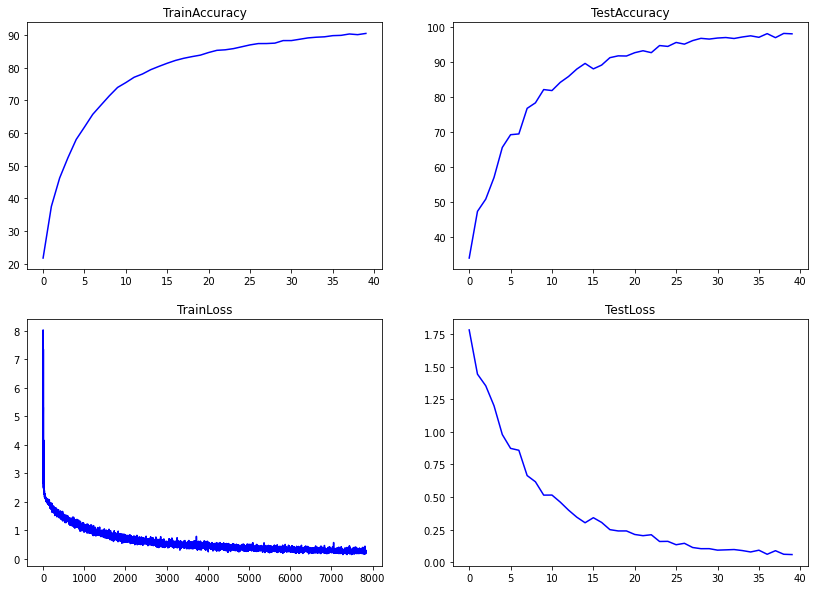

In [10]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

## Misclassified Examples Visualisations

Total wrong predictions are 958


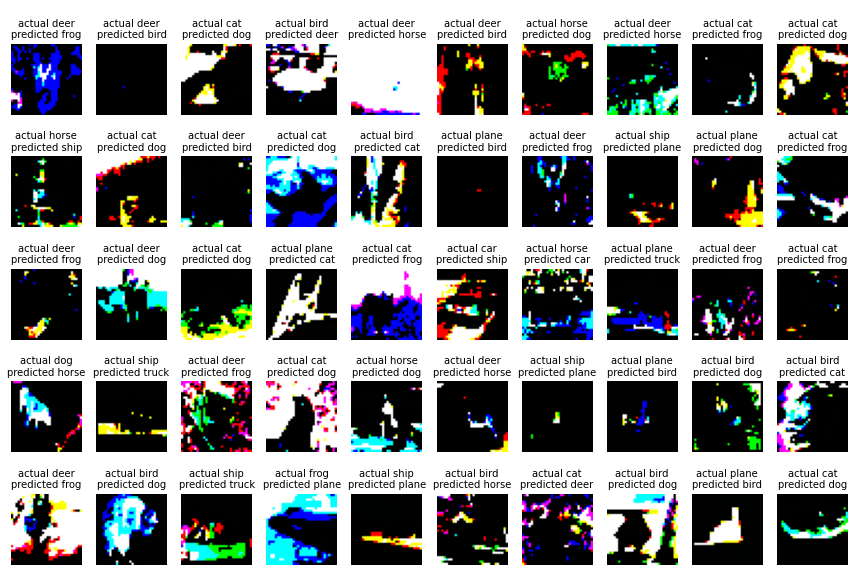

In [11]:
Plots.miscImages(modelfinal,test_data,device)
plt.show()

## Class-Level Accuracy

In [12]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images["image"].to(device)
        labels = labels.to(device)
        outputs = modelfinal(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 98 %
Accuracy of   car : 98 %
Accuracy of  bird : 97 %
Accuracy of   cat : 97 %
Accuracy of  deer : 97 %
Accuracy of   dog : 98 %
Accuracy of  frog : 100 %
Accuracy of horse : 97 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


## CAM Visualisation

In [15]:
# using layer 3 as it's 8x8 in width & height
target_layer = model.layer3[-1]

# Construct the CAM object once, and then re-use it on many images:
cam =  GradCAM(model=model, target_layer=target_layer, use_cuda=device)
denorm = DeNorm()

======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:04<00:00, 86.68it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


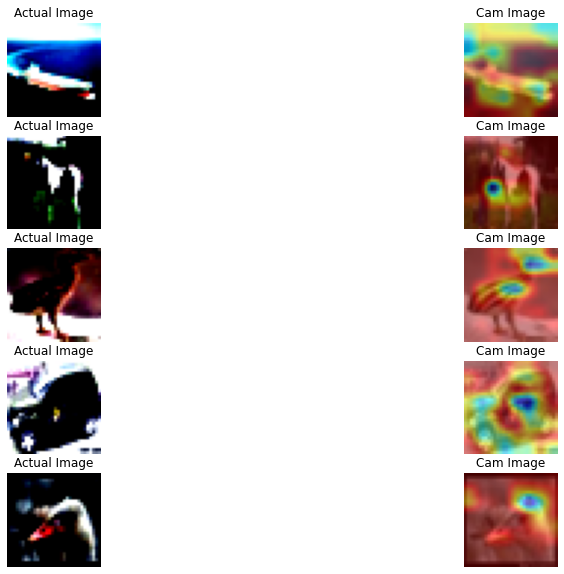

In [16]:
Plots.plot_grad_cam(cam,images[:5],None,denorm)
# result 